In [2]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

Beat: 0 - 1 (dur: 1)
Skipped 21 divisions with a div. penalty > 0.2
Best 1 divisions: 


error,div,snapped,slots,info
0.002,"(1,)",[«0.000:1.000 4C tiedNext»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 21 divisions with a div. penalty > 0.2
Best 1 divisions: 


error,div,snapped,slots,info
0.002,"(1,)",[«0.000:1.000 4C tiedPrev»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Skipped 21 divisions with a div. penalty > 0.2
Best 20 divisions: 


error,div,snapped,slots,info
0.002,"(7,)","[«0.000:0.143 4C#», «0.143:1.000 4D tiedNext»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.01077,"(7, 1)","[«0.000:0.143 4C#», «0.143:1.000 4D tiedNext»]","[0, 2]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.011874,"(7, 1, 1)","[«0.000:0.143 4C#», «0.143:1.000 4D tiedNext»]","[0, 3]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.064 (0.0006403, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.026444,"(5, 1, 1, 1)","[«0.000:0.150 4C#», «0.150:1.000 4D tiedNext»]","[0, 3]","gridError=0.0192, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.027578,"(4, 1, 1, 1, 1)","[«0.000:0.150 4C#», «0.150:1.000 4D tiedNext»]","[0, 3]","gridError=0.0192, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0808 (0.0008078, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.03095,"(5, 1, 1)","[«0.000:0.133 4C#», «0.133:1.000 4D tiedNext»]","[0, 2]","gridError=0.0246, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0539 (0.0005385, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.031387,"(3, 1, 1, 1, 1)","[«0.000:0.133 4C#», «0.133:1.000 4D tiedNext»]","[0, 2]","gridError=0.0246, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.075 (0.00075, divPenalty=0, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.041978,"(8,)","[«0.000:0.125 4C#», «0.125:1.000 4D tiedNext»]","[0, 1]","gridError=0.0419, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.043107,"(2, 1, 1, 1)","[«0.000:0.125 4C#», «0.125:1.000 4D tiedNext»]","[0, 1]","gridError=0.0419, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.043292,"(4, 1)","[«0.000:0.125 4C#», «0.125:1.000 4D tiedNext»]","[0, 1]","gridError=0.0419, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3 - 4 (dur: 1)
Skipped 21 divisions with a div. penalty > 0.2
Best 18 divisions: 


error,div,snapped,slots,info
0.002,"(3,)","[«0.000:0.333 4D tiedPrev», «0.333:1.000 rest»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0073485,"(1, 1, 1)","[«0.000:0.333 4D tiedPrev», «0.333:1.000 rest»]","[0, 1]","gridError=0, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0539 (0.0005385, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.01,"(1, 3, 1, 1)","[«0.000:0.333 4D tiedPrev», «0.333:1.000 rest»]","[0, 2]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.010198,"(3, 1)","[«0.000:0.333 4D tiedPrev», «0.333:1.000 rest»]","[0, 2]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0125,"(1, 3, 1, 1, 1)","[«0.000:0.333 4D tiedPrev», «0.333:1.000 rest»]","[0, 3]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.075 (0.00075, divPenalty=0, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.036303,"(1, 5, 1, 1)","[«0.000:0.350 4D tiedPrev», «0.350:1.000 rest»]","[0, 3]","gridError=0.0314, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.037137,"(1, 4, 1, 1, 1)","[«0.000:0.350 4D tiedPrev», «0.350:1.000 rest»]","[0, 4]","gridError=0.0314, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0808 (0.0008078, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.049488,"(1, 4, 1, 1)","[«0.000:0.312 4D tiedPrev», «0.312:1.000 rest»]","[0, 2]","gridError=0.038, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.04961,"(8, 1)","[«0.000:0.312 4D tiedPrev», «0.312:1.000 rest»]","[0, 5]","gridError=0.038, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.053192,"(7, 1)","[«0.000:0.357 4D tiedPrev», «0.357:1.000 rest»]","[0, 5]","gridError=0.0426, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



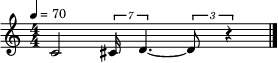

In [8]:
notes = [
    (60, F(2, 1)),
    (61, F(1, 7)),
    (62, F(6, 7)+F(1, 3))
]

struct = ScoreStruct(timesig='4/4', quarterTempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)
qprofile = scoring.quant.makeQuantizationProfile('high')
qprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, profile=qprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Beat: 0 - 1 (dur: 1)
Skipped 66 divisions with a div. penalty > 0.4
Best 1 divisions: 


error,div,snapped,slots,info
0.002,"(1,)",[«0.000:1.000 4C tiedNext»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 66 divisions with a div. penalty > 0.4
Best 1 divisions: 


error,div,snapped,slots,info
0.002,"(1,)",[«0.000:1.000 4C tiedPrev»],[0],"gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Skipped 66 divisions with a div. penalty > 0.4
Best 20 divisions: 


error,div,snapped,slots,info
0.012667,"(1, 1, 1, 6)","[«0.000:0.750 4C#», «0.750:0.792 4D#», «0.792:1.000 4E»]","[0, 3, 4]","gridError=0, rhythmComplexity=0.38 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.015033,"(1, 1, 8)","[«0.000:0.750 4C#», «0.750:0.792 4D#», «0.792:1.000 4E»]","[0, 4, 5]","gridError=0, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.051 (0.0005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.022599,"(1, 1, 1, 7)","[«0.000:0.750 4C#», «0.750:0.786 4D#», «0.786:1.000 4E»]","[0, 3, 4]","gridError=0.021, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.051 (0.0005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.028508,"(1, 1, 1, 5)","[«0.000:0.750 4C#», «0.750:0.800 4D#», «0.800:1.000 4E»]","[0, 3, 4]","gridError=0.0275, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0374 (0.0003742, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.029762,"(1, 1, 1, 4, 1)","[«0.000:0.750 4C#», «0.750:0.800 4D#», «0.800:1.000 4E»]","[0, 6, 7]","gridError=0.0275, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.0561 (0.0005612, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.047381,"(1, 1, 1, 5, 1)","[«0.000:0.760 4C#», «0.760:0.800 4D#», «0.800:1.000 4E»]","[0, 7, 8]","gridError=0.0444, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0842 (0.0008419, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.056437,"(1, 1, 9)","[«0.000:0.741 4C#», «0.741:0.778 4D#», «0.778:1.000 4E»]","[0, 4, 5]","gridError=0.0544, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.051 (0.0005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.057585,"(1, 1, 1, 4)","[«0.000:0.750 4C#», «0.750:0.812 4D#», «0.812:1.000 4E»]","[0, 3, 4]","gridError=0.0572, rhythmComplexity=0.211 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.058169,"(1, 8)","[«0.000:0.750 4C#», «0.750:0.812 4D#», «0.812:1.000 4E»]","[0, 5, 6]","gridError=0.0572, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.067452,"(1, 1, 7)","[«0.000:0.762 4C#», «0.762:0.810 4D#», «0.810:1.000 4E»]","[0, 4, 5]","gridError=0.0665, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.051 (0.0005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"



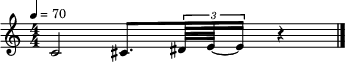

In [9]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)*F(1, 6)),
    (64, F(1, 4)*F(5, 6)),
    # (62, F(3, 4))
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', quarterTempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.makeQuantizationProfile('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

In [6]:
quantprofile.debug  = False
%timeit scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)


85.1 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
notes = [
    (60, F(2, 3)*F(1, 5)),
    (61, F(2, 3)*F(1, 5)),
    (62, F(2, 3)*F(1, 5)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2,3)),
    #(60, F(2, 7)),
    #(61, F(3, 7)),
    #(62, F(4, 7))
    
    
    ]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)
quantprofile = scoring.quant.makeQuantizationProfile('highest')
quantprofile.rhythmComplexityWeight  = 0.001
quantprofile.debug=True
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Beat: 0 - 1 (dur: 1)
Skipped 66 divisions with a div. penalty > 0.4
Best 20 divisions: 


error,div,snapped,slots,info
0.028887,"(1, 5)","[«0.000:0.500 4C#», «0.500:0.600 4E», «0.600:0.700 4F», «0.700:0.800 4F#», «0.800:0.900 4G», «0.900:1.000 4G# tiedNext»]","[0, 1, 2, 3, 4, 5]","gridError=0, rhythmComplexity=0.264 (numNotesAcrossSubdics=5, numTies=0), divPenalty=0.0374 (0.003742, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.030894,"(1, 1, 5, 5)","[«0.000:0.500 4C#», «0.500:0.600 4E», «0.600:0.700 4F», «0.700:0.800 4F#», «0.800:0.900 4G», «0.900:1.000 4G# tiedNext»]","[0, 2, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.264 (numNotesAcrossSubdics=5, numTies=0), divPenalty=0.051 (0.005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.036263,"(1, 1, 2, 2, 2)","[«0.000:0.500 4C#», «0.500:0.600 4E», «0.600:0.700 4F», «0.700:0.800 4F#», «0.800:0.900 4G», «0.900:1.000 4G# tiedNext»]","[0, 3, 4, 5, 6, 7]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=6, numTies=0), divPenalty=0.0561 (0.005612, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.069064,"(1, 1, 2, 5, 2)","[«0.000:0.500 4C#», «0.500:0.600 4E», «0.600:0.680 4F», «0.680:0.800 4F#», «0.800:0.900 4G», «0.900:1.000 4G# tiedNext»]","[0, 3, 4, 6, 9, 10]","gridError=0.0553, rhythmComplexity=0.316 (numNotesAcrossSubdics=6, numTies=0), divPenalty=0.0842 (0.008419, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.069064,"(1, 1, 5, 2, 2)","[«0.000:0.480 4C#», «0.480:0.600 4E», «0.600:0.700 4F», «0.700:0.800 4F#», «0.800:0.900 4G», «0.900:1.000 4G# tiedNext»]","[0, 4, 7, 8, 9, 10]","gridError=0.0553, rhythmComplexity=0.316 (numNotesAcrossSubdics=6, numTies=0), divPenalty=0.0842 (0.008419, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.069064,"(1, 1, 2, 2, 5)","[«0.000:0.500 4C#», «0.500:0.600 4E», «0.600:0.700 4F», «0.700:0.800 4F#», «0.800:0.880 4G», «0.880:1.000 4G# tiedNext»]","[0, 3, 4, 5, 6, 8]","gridError=0.0553, rhythmComplexity=0.316 (numNotesAcrossSubdics=6, numTies=0), divPenalty=0.0842 (0.008419, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.071965,"(1, 1, 5, 7)","[«0.000:0.500 4C#», «0.500:0.600 4E», «0.600:0.700 4F», «0.700:0.786 4F#», «0.786:0.893 4G», «0.893:1.000 4G# tiedNext»]","[0, 2, 4, 6, 8, 11]","gridError=0.0522, rhythmComplexity=0.264 (numNotesAcrossSubdics=5, numTies=0), divPenalty=0.133 (0.01327, divPenalty=0.04, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0)"
0.071965,"(1, 1, 7, 5)","[«0.000:0.500 4C#», «0.500:0.607 4E», «0.607:0.714 4F», «0.714:0.800 4F#», «0.800:0.900 4G», «0.900:1.000 4G# tiedNext»]","[0, 2, 5, 8, 10, 12]","gridError=0.0522, rhythmComplexity=0.264 (numNotesAcrossSubdics=5, numTies=0), divPenalty=0.133 (0.01327, divPenalty=0.04, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0)"
0.074692,"(1, 1, 6, 5)","[«0.000:0.500 4C#», «0.500:0.583 4E», «0.583:0.708 4F», «0.708:0.800 4F#», «0.800:0.900 4G», «0.900:1.000 4G# tiedNext»]","[0, 2, 4, 7, 9, 11]","gridError=0.0661, rhythmComplexity=0.307 (numNotesAcrossSubdics=5, numTies=1), divPenalty=0.051 (0.005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.074692,"(1, 1, 5, 6)","[«0.000:0.500 4C#», «0.500:0.600 4E», «0.600:0.700 4F», «0.700:0.792 4F#», «0.792:0.917 4G», «0.917:1.000 4G# tiedNext»]","[0, 2, 4, 6, 8, 11]","gridError=0.0661, rhythmComplexity=0.307 (numNotesAcrossSubdics=5, numTies=1), divPenalty=0.051 (0.005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 66 divisions with a div. penalty > 0.4
Best 20 divisions: 


error,div,snapped,slots,info
0.043929,"(7, 7, 1)","[«0.000:0.095 4G# tiedPrev», «0.095:0.429 4D», «0.429:1.000 rest»]","[0, 2, 9]","gridError=0.0217, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.0678 (0.006782, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.050843,"(2, 1, 6, 1, 1)","[«0.000:0.100 4G# tiedPrev», «0.100:0.433 4D», «0.433:1.000 rest»]","[0, 1, 4]","gridError=0, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0765 (0.007649, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.053502,"(9,)","[«0.000:0.111 4G# tiedPrev», «0.111:0.444 4D», «0.444:1.000 rest»]","[0, 1, 4]","gridError=0.0427, rhythmComplexity=0.316 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.059804,"(7, 7, 1, 1)","[«0.000:0.107 4G# tiedPrev», «0.107:0.429 4D», «0.429:1.000 rest»]","[0, 3, 12]","gridError=0.0334, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0678 (0.006782, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.060213,"(5, 3, 1, 1)","[«0.000:0.100 4G# tiedPrev», «0.100:0.417 4D», «0.417:1.000 rest»]","[0, 2, 7]","gridError=0.0385, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0374 (0.003742, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.061202,"(5, 5, 1, 1)","[«0.000:0.100 4G# tiedPrev», «0.100:0.450 4D», «0.450:1.000 rest»]","[0, 2, 9]","gridError=0.0385, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.051 (0.005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.061649,"(2, 1, 4, 1, 1)","[«0.000:0.100 4G# tiedPrev», «0.100:0.450 4D», «0.450:1.000 rest»]","[0, 1, 4]","gridError=0.0385, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0561 (0.005612, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.06293,"(5, 7, 1, 1)","[«0.000:0.100 4G# tiedPrev», «0.100:0.429 4D», «0.429:1.000 rest»]","[0, 2, 10]","gridError=0.0141, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.133 (0.01327, divPenalty=0.04, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0)"
0.062948,"(3, 3, 1)","[«0.000:0.111 4G# tiedPrev», «0.111:0.444 4D», «0.444:1.000 rest»]","[0, 1, 4]","gridError=0.0427, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0374 (0.003742, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.063894,"(9, 1)","[«0.000:0.111 4G# tiedPrev», «0.111:0.444 4D», «0.444:1.000 rest»]","[0, 2, 8]","gridError=0.0427, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.051 (0.005099, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"



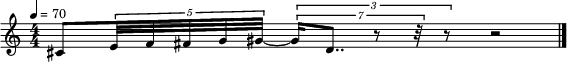

In [10]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    #(60, F(1, 2)),
    #(60.5, F(3, 2)),
    (61, F(1, 2)),
    # (62, F(1, 4)),
    (64, F(1, 10)),
    (65, F(1, 10)),
    (66, F(1, 10)),
    (67, F(1, 10)),
    (68, F(1, 5)),
    (62, F(1, 3)),
    
    
    # (67.5, F(1, 3)*F(8, 7)),   
]
struct = ScoreStruct(timesig='4/4', quarterTempo=70)


notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)
quantprofile = scoring.quant.makeQuantizationProfile('highest', nestedTuplets=True)
quantprofile.divisionErrorWeight = 0.1
quantprofile.rhythmComplexityWeight = 0.01
quantprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Beat: 0 - 1 (dur: 1)
Skipped 21 divisions with a div. penalty > 0.2
Best 18 divisions: 


error,div,snapped,slots,info
0.0044721,"(3,)","[«0.000:0.667 4C#», «0.667:1.000 4E tiedNext»]","[0, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.01,"(1, 1, 3, 1)","[«0.000:0.667 4C#», «0.667:1.000 4E tiedNext»]","[0, 4]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.010954,"(1, 3)","[«0.000:0.667 4C#», «0.667:1.000 4E tiedNext»]","[0, 2]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.013038,"(1, 1, 1)","[«0.000:0.667 4C#», «0.667:1.000 4E tiedNext»]","[0, 2]","gridError=0, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0539 (0.002693, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.019526,"(1, 1, 1, 3, 1)","[«0.000:0.667 4C#», «0.667:1.000 4E tiedNext»]","[0, 4]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.075 (0.00375, divPenalty=0, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.043687,"(1, 1, 5, 1)","[«0.000:0.650 4C#», «0.650:1.000 4E tiedNext»]","[0, 5]","gridError=0.0395, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.047062,"(1, 1, 1, 4, 1)","[«0.000:0.650 4C#», «0.650:1.000 4E tiedNext»]","[0, 4]","gridError=0.0395, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.0808 (0.004039, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.057488,"(1, 1, 4, 1)","[«0.000:0.688 4C#», «0.688:1.000 4E tiedNext»]","[0, 5]","gridError=0.0478, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.058008,"(1, 8)","[«0.000:0.688 4C#», «0.688:1.000 4E tiedNext»]","[0, 4]","gridError=0.0478, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.04 (0.002, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.062827,"(1, 7)","[«0.000:0.643 4C#», «0.643:1.000 4E tiedNext»]","[0, 3]","gridError=0.0535, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.04 (0.002, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 21 divisions with a div. penalty > 0.2
Best 20 divisions: 


error,div,snapped,slots,info
0.0044721,"(3,)","[«0.000:0.333 4E tiedPrev», «0.333:0.667 4F», «0.667:1.000 4F+»]","[0, 1, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.01,"(1, 3, 3, 1)","[«0.000:0.333 4E tiedPrev», «0.333:0.667 4F», «0.667:1.000 4F+»]","[0, 2, 6]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.012494,"(1, 1, 1)","[«0.000:0.333 4E tiedPrev», «0.333:0.667 4F», «0.667:1.000 4F+»]","[0, 1, 2]","gridError=0, rhythmComplexity=0.105 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0539 (0.002693, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.013416,"(3, 3)","[«0.000:0.333 4E tiedPrev», «0.333:0.667 4F», «0.667:1.000 4F+»]","[0, 2, 4]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.04 (0.002, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.027071,"(1, 3, 1, 3, 1)","[«0.000:0.333 4E tiedPrev», «0.333:0.667 4F», «0.667:1.000 4F+»]","[0, 3, 6]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.113 (0.005625, divPenalty=0, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.042233,"(1, 5, 3, 1)","[«0.000:0.350 4E tiedPrev», «0.350:0.667 4F», «0.667:1.000 4F+»]","[0, 3, 8]","gridError=0.0395, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.042233,"(1, 3, 5, 1)","[«0.000:0.333 4E tiedPrev», «0.333:0.650 4F», «0.650:1.000 4F+»]","[0, 2, 7]","gridError=0.0395, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.045715,"(1, 3, 1, 4, 1)","[«0.000:0.333 4E tiedPrev», «0.333:0.650 4F», «0.650:1.000 4F+»]","[0, 3, 6]","gridError=0.0395, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0808 (0.004039, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.045715,"(1, 4, 1, 3, 1)","[«0.000:0.350 4E tiedPrev», «0.350:0.667 4F», «0.667:1.000 4F+»]","[0, 4, 7]","gridError=0.0395, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0808 (0.004039, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.052962,"(1, 4, 3, 1)","[«0.000:0.312 4E tiedPrev», «0.312:0.667 4F», «0.667:1.000 4F+»]","[0, 2, 7]","gridError=0.0478, rhythmComplexity=0.707 (numNotesAcrossSubdics=3, numTies=2), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



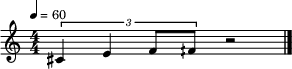

In [11]:
from maelzel import scoring
from maelzel.common import F
from maelzel.scorestruct import ScoreStruct

notes = [
    (61, F(2, 3)),
    (64, F(2, 3)),
    (65, F(1, 3)),
    (65.5, F(1, 3)),
]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)

struct = ScoreStruct(timesig='4/4', quarterTempo=60)

quantprofile = scoring.quant.makeQuantizationProfile('high', divisionErrorWeight=0.05)
quantprofile.debug= True

qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Score(1 voices)
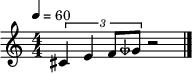

In [13]:
sco = r.score.toCoreScore()
sco


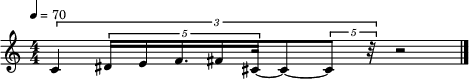

In [12]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2, 3)*F(3, 10)),
    (66, F(2, 3)*F(1, 5)),
    # (67, F(2, 3)*F(1, 5)),  
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', quarterTempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.makeQuantizationProfile('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
#quantprofile.rhythmComplexityWeight = 0.001
#quantprofile.allowedTupletsAcrossBeat = (3, 5)
# quantprofile.minBeatFractionAcrossBeats = 1/8
#quantprofile.minSymbolicDurationAcrossBeat = F(1, 3)

# quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

In [11]:
quantprofile.debug  = False
%prun scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)


         140804 function calls (140773 primitive calls) in 0.111 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2058    0.016    0.000    0.045    0.000 quant.py:486(snapEventsToGrid)
     2058    0.014    0.000    0.019    0.000 quantutils.py:98(simplifyDivision)
        4    0.013    0.003    0.109    0.027 quant.py:946(quantizeBeat)
     8232    0.012    0.000    0.018    0.000 misc.py:185(nearest_index)
     6524    0.006    0.000    0.011    0.000 quant.py:267(divisionPenalty)
     8232    0.005    0.000    0.005    0.000 {built-in method _bisect.bisect_right}
     2058    0.004    0.000    0.023    0.000 quant.py:462(<listcomp>)
      208    0.004    0.000    0.007    0.000 quant.py:630(_evalGridError)
     8232    0.003    0.000    0.003    0.000 <string>:2(__init__)
    26195    0.003    0.000    0.003    0.000 {built-in method builtins.len}
     6016    0.003    0.000    0.003    0.000 {built-in method builti

Beat: 0 - 1 (dur: 1)
Skipped 2187 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.071547,"(1, 1, 1, 3, 6)","[«0.000:0.667 4C», «0.667:grace 4D#», «0.667:0.733 4E», «0.733:0.833 4F», «0.833:0.867 4F#», «0.867:0.900 4D#», «0.900:0.933 4E», «0.933:1.000 4F tiedNext»]","[0, 4, 4, 5, 7, 8, 9, 10]","gridError=0.0714, rhythmComplexity=0.316 (numNotesAcrossSubdics=8, numTies=0), divPenalty=0.0765 (0.000153, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.083394,"(1, 1, 1, 4, 6)","[«0.000:0.650 4C», «0.650:0.700 4D#», «0.700:0.750 4E», «0.750:0.833 4F», «0.833:0.867 4F#», «0.867:0.900 4D#», «0.900:0.933 4E», «0.933:1.000 4F tiedNext»]","[0, 4, 5, 6, 8, 9, 10, 11]","gridError=0.0833, rhythmComplexity=0.338 (numNotesAcrossSubdics=8, numTies=1), divPenalty=0.0765 (0.000153, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.093731,"(1, 1, 1, 6, 4)","[«0.000:0.667 4C», «0.667:0.700 4D#», «0.700:0.733 4E», «0.733:0.850 4F», «0.850:grace 4F#», «0.850:0.900 4D#», «0.900:0.950 4E», «0.950:1.000 4F tiedNext»]","[0, 5, 6, 7, 10, 10, 11, 12]","gridError=0.0936, rhythmComplexity=0.316 (numNotesAcrossSubdics=8, numTies=0), divPenalty=0.0765 (0.000153, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.10429,"(1, 1, 1, 2, 6)","[«0.000:0.700 4C», «0.700:grace 4D#», «0.700:grace 4E», «0.700:0.833 4F», «0.833:0.867 4F#», «0.867:0.900 4D#», «0.900:0.933 4E», «0.933:1.000 4F tiedNext»]","[0, 4, 4, 4, 6, 7, 8, 9]","gridError=0.104, rhythmComplexity=0.316 (numNotesAcrossSubdics=8, numTies=0), divPenalty=0.0765 (0.000153, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.11055,"(1, 1, 6, 7)","[«0.000:0.667 4C», «0.667:0.708 4D#», «0.708:0.750 4E», «0.750:0.821 4F», «0.821:0.857 4F#», «0.857:0.893 4D#», «0.893:0.929 4E», «0.929:1.000 4F tiedNext»]","[0, 6, 7, 8, 10, 11, 12, 13]","gridError=0.11, rhythmComplexity=0.316 (numNotesAcrossSubdics=8, numTies=0), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.11364,"(1, 1, 8)","[«0.000:0.667 4C», «0.667:0.708 4D#», «0.708:0.750 4E», «0.750:0.833 4F», «0.833:0.875 4F#», «0.875:0.917 4D#», «0.917:grace 4E», «0.917:1.000 4F tiedNext»]","[0, 2, 3, 4, 6, 7, 8, 8]","gridError=0.114, rhythmComplexity=0.277 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.11366,"(1, 1, 6, 6)","[«0.000:0.667 4C», «0.667:0.708 4D#», «0.708:0.750 4E», «0.750:0.833 4F», «0.833:0.875 4F#», «0.875:0.917 4D#», «0.917:grace 4E», «0.917:1.000 4F tiedNext»]","[0, 6, 7, 8, 10, 11, 12, 12]","gridError=0.114, rhythmComplexity=0.316 (numNotesAcrossSubdics=8, numTies=0), divPenalty=0.06 (0.00012, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11523,"(1, 1, 9)","[«0.000:0.667 4C», «0.667:0.704 4D#», «0.704:0.741 4E», «0.741:0.815 4F», «0.815:0.852 4F#», «0.852:0.889 4D#», «0.889:0.926 4E», «0.926:1.000 4F tiedNext»]","[0, 2, 3, 4, 6, 7, 8, 9]","gridError=0.115, rhythmComplexity=0.277 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.11839,"(1, 1, 6)","[«0.000:0.667 4C», «0.667:0.722 4D#», «0.722:grace 4E», «0.722:0.833 4F», «0.833:0.889 4F#», «0.889:grace 4D#», «0.889:0.944 4E», «0.944:1.000 4F tiedNext»]","[0, 2, 3, 3, 5, 6, 6, 7]","gridError=0.118, rhythmComplexity=0.277 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11841,"(1, 9)","[«0.000:0.667 4C», «0.667:0.722 4D#», «0.722:grace 4E», «0.722:0.833 4F», «0.833:0.889 4F#», «0.889:grace 4D#», «0.889:0.944 4E», «0.944:1.000 4F tiedNext»]","[0, 4, 5, 5, 7, 8, 8, 9]","gridError=0.118, rhythmComplexity=0.316 (numNotesAcrossSubdics=8, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 2187 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.0038987,"(5, 1, 5)","[«0.000:0.067 4F tiedPrev», «0.067:0.733 4C#», «0.733:1.000 rest»]","[0, 1, 7]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0049168,"(3, 1, 1, 3, 1)","[«0.000:0.067 4F tiedPrev», «0.067:0.733 4C#», «0.733:1.000 rest»]","[0, 1, 7]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.0842 (0.0001684, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.020763,"(5, 1, 9)","[«0.000:0.067 4F tiedPrev», «0.067:0.741 4C#», «0.741:1.000 rest»]","[0, 1, 8]","gridError=0.0201, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.025493,"(9, 1, 5)","[«0.000:0.074 4F tiedPrev», «0.074:0.733 4C#», «0.733:1.000 rest»]","[0, 2, 11]","gridError=0.025, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.02884,"(5, 1, 6)","[«0.000:0.067 4F tiedPrev», «0.067:0.722 4C#», «0.722:1.000 rest»]","[0, 1, 7]","gridError=0.0279, rhythmComplexity=0.707 (numNotesAcrossSubdics=3, numTies=2), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.031174,"(9, 1, 9)","[«0.000:0.074 4F tiedPrev», «0.074:0.741 4C#», «0.741:1.000 rest»]","[0, 2, 12]","gridError=0.0309, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.032768,"(3, 1, 1, 5, 1)","[«0.000:0.067 4F tiedPrev», «0.067:0.720 4C#», «0.720:1.000 rest»]","[0, 1, 8]","gridError=0.0322, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.0842 (0.0001684, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.033499,"(8, 9)","[«0.000:0.062 4F tiedPrev», «0.062:0.722 4C#», «0.722:1.000 rest»]","[0, 1, 12]","gridError=0.0327, rhythmComplexity=0.707 (numNotesAcrossSubdics=3, numTies=2), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.034934,"(6, 1, 5)","[«0.000:0.056 4F tiedPrev», «0.056:0.733 4C#», «0.733:1.000 rest»]","[0, 1, 8]","gridError=0.0346, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.038844,"(5, 2, 4)","[«0.000:0.067 4F tiedPrev», «0.067:0.750 4C#», «0.750:1.000 rest»]","[0, 1, 8]","gridError=0.0385, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



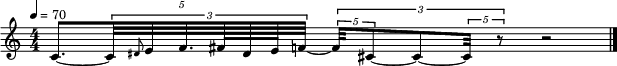

In [15]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 20)),
    (64, F(2, 3)*F(1, 20)),
    (65, F(2, 3)*F(3, 20)),
    (66, F(2, 3)*F(1, 20)),
    (63, F(2, 3)*F(1, 20)),
    (64, F(2, 3)*F(1, 20)),
    (65, F(2, 3)*F(2, 10)),
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', quarterTempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.makeQuantizationProfile('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
#quantprofile.rhythmComplexityWeight = 0.001
#quantprofile.divisionErrorWeight = 0.01
quantprofile.minBeatFractionAcrossBeats = F(1, 8)
quantprofile.minSymbolicDurationAcrossBeat = F(1, 3)

qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

In [14]:
quantprofile.debug  = False
%timeit scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)


46.3 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Beat: 0 - 1 (dur: 1)
Skipped 2187 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.0030984,"(1, 4, 2, 4)","[«0.000:0.250 4C», «0.250:0.438 4D#», «0.438:0.625 4E», «0.625:0.812 4F», «0.812:1.000 4F#»]","[0, 1, 4, 6, 8]","gridError=0, rhythmComplexity=0.253 (numNotesAcrossSubdics=4, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0036332,"(8, 8)","[«0.000:0.250 4C», «0.250:0.438 4D#», «0.438:0.625 4E», «0.625:0.812 4F», «0.812:1.000 4F#»]","[0, 4, 7, 10, 13]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=5, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.029467,"(1, 7, 2, 4)","[«0.000:0.250 4C», «0.250:0.429 4D#», «0.429:0.625 4E», «0.625:0.812 4F», «0.812:1.000 4F#»]","[0, 1, 6, 9, 11]","gridError=0.029, rhythmComplexity=0.456 (numNotesAcrossSubdics=4, numTies=2), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.029467,"(1, 4, 2, 7)","[«0.000:0.250 4C», «0.250:0.438 4D#», «0.438:0.625 4E», «0.625:0.821 4F», «0.821:1.000 4F#»]","[0, 1, 4, 6, 9]","gridError=0.029, rhythmComplexity=0.456 (numNotesAcrossSubdics=4, numTies=2), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.035839,"(4, 9, 9)","[«0.000:0.250 4C», «0.250:0.444 4D#», «0.444:0.630 4E», «0.630:0.815 4F», «0.815:1.000 4F#»]","[0, 3, 7, 12, 17]","gridError=0.0351, rhythmComplexity=0.651 (numNotesAcrossSubdics=5, numTies=3), divPenalty=0.06 (0.00012, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.03814,"(1, 4, 2, 5)","[«0.000:0.250 4C», «0.250:0.438 4D#», «0.438:0.625 4E», «0.625:0.800 4F», «0.800:1.000 4F#»]","[0, 1, 4, 6, 8]","gridError=0.038, rhythmComplexity=0.253 (numNotesAcrossSubdics=4, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.03814,"(1, 5, 2, 4)","[«0.000:0.250 4C», «0.250:0.450 4D#», «0.450:0.625 4E», «0.625:0.812 4F», «0.812:1.000 4F#»]","[0, 1, 5, 7, 9]","gridError=0.038, rhythmComplexity=0.253 (numNotesAcrossSubdics=4, numTies=0), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.038913,"(4, 9, 7)","[«0.000:0.250 4C», «0.250:0.444 4D#», «0.444:0.630 4E», «0.630:0.810 4F», «0.810:1.000 4F#»]","[0, 3, 7, 12, 16]","gridError=0.0385, rhythmComplexity=0.494 (numNotesAcrossSubdics=5, numTies=2), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.04323,"(4, 7, 7)","[«0.000:0.250 4C», «0.250:0.429 4D#», «0.429:0.619 4E», «0.619:0.810 4F», «0.810:1.000 4F#»]","[0, 3, 6, 10, 14]","gridError=0.043, rhythmComplexity=0.369 (numNotesAcrossSubdics=5, numTies=1), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.044183,"(4, 7, 9)","[«0.000:0.250 4C», «0.250:0.429 4D#», «0.429:0.619 4E», «0.619:0.815 4F», «0.815:1.000 4F#»]","[0, 3, 6, 10, 15]","gridError=0.0436, rhythmComplexity=0.651 (numNotesAcrossSubdics=5, numTies=3), divPenalty=0.0678 (0.0001356, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Skipped 2187 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.0057706,"(4, 1, 1, 1)","[«0.000:0.188 4G», «0.188:1.000 4C tiedNext»]","[0, 3]","gridError=0, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0059749,"(8, 1)","[«0.000:0.188 4G», «0.188:1.000 4C tiedNext»]","[0, 3]","gridError=0, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.013525,"(7, 1, 1)","[«0.000:0.190 4G», «0.190:1.000 4C tiedNext»]","[0, 4]","gridError=0.0121, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.014225,"(9, 1, 1)","[«0.000:0.185 4G», «0.185:1.000 4C tiedNext»]","[0, 5]","gridError=0.00986, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.021241,"(11,)","[«0.000:0.182 4G», «0.182:1.000 4C tiedNext»]","[0, 2]","gridError=0.0202, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.030782,"(7, 1, 1, 1)","[«0.000:0.179 4G», «0.179:1.000 4C tiedNext»]","[0, 5]","gridError=0.029, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.037998,"(5,)","[«0.000:0.200 4G», «0.200:1.000 4C tiedNext»]","[0, 1]","gridError=0.038, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.038103,"(1, 1, 1, 1, 1)","[«0.000:0.200 4G», «0.200:1.000 4C tiedNext»]","[0, 1]","gridError=0.038, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0561 (0.0001122, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.038155,"(5, 1)","[«0.000:0.200 4G», «0.200:1.000 4C tiedNext»]","[0, 2]","gridError=0.038, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.038155,"(5, 1, 1)","[«0.000:0.200 4G», «0.200:1.000 4C tiedNext»]","[0, 3]","gridError=0.038, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 3 (dur: 1)
Skipped 2187 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.0057706,"(4, 1, 1, 1)","[«0.000:0.188 4C tiedPrev», «0.188:1.000 rest»]","[0, 3]","gridError=0, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0059749,"(8, 1)","[«0.000:0.188 4C tiedPrev», «0.188:1.000 rest»]","[0, 3]","gridError=0, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.011492,"(7, 1, 1)","[«0.000:0.190 4C tiedPrev», «0.190:1.000 rest»]","[0, 4]","gridError=0.00971, rhythmComplexity=0.57 (numNotesAcrossSubdics=2, numTies=1), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.012974,"(9, 1, 1)","[«0.000:0.185 4C tiedPrev», «0.185:1.000 rest»]","[0, 5]","gridError=0.00794, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.017551,"(11,)","[«0.000:0.182 4C tiedPrev», «0.182:1.000 rest»]","[0, 2]","gridError=0.0163, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.025544,"(7, 1, 1, 1)","[«0.000:0.179 4C tiedPrev», «0.179:1.000 rest»]","[0, 5]","gridError=0.0234, rhythmComplexity=1 (numNotesAcrossSubdics=2, numTies=2), divPenalty=0.051 (0.000102, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.030633,"(5,)","[«0.000:0.200 4C tiedPrev», «0.200:1.000 rest»]","[0, 1]","gridError=0.0306, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.030763,"(1, 1, 1, 1, 1)","[«0.000:0.200 4C tiedPrev», «0.200:1.000 rest»]","[0, 1]","gridError=0.0306, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.0561 (0.0001122, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.030828,"(5, 1)","[«0.000:0.200 4C tiedPrev», «0.200:1.000 rest»]","[0, 2]","gridError=0.0306, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.030828,"(5, 1, 1)","[«0.000:0.200 4C tiedPrev», «0.200:1.000 rest»]","[0, 3]","gridError=0.0306, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"



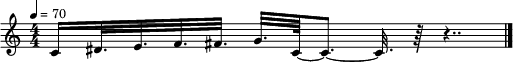

In [16]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(1, 4)),
    (63, F(1, 4)*F(3, 4)),
    (64, F(1, 4)*F(3, 4)),
    (65, F(1, 4)*F(3, 4)),
    (66, F(1, 4)*F(3, 4)),
    (67, F(1, 4)*F(3, 4)),
    (60, F(1)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', quarterTempo=70)

part = scoring.Part(notations)
quantprofile = scoring.quant.makeQuantizationProfile('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

noteheads ['hidden']
Measure #0
Timesig: 4/4 (quarter=70)
  Ratio (1, 1)
    DurationGroup(1/1, 
  «0.000:0.250 4C tiedNext spanners=[Slur(kind=start, uuid=c1r1k8wp)]»
  «0.250:0.750 4C gliss»
  «0.750:1.000 4F spanners=[Slur(kind=end, uuid=c1r1k8wp)]»
  «1.000:4.000 rest»
)



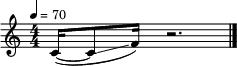

In [17]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(1, 4), tiedNext=True),
    makeNote(60, F(1, 4), tiedNext=True, gliss=True),
    makeNote(60, F(1, 4), tiedPrev=True),
    makeNote(65, F(1, 4))
]

notes[0].addSpanner(spanner.Slur(), notes[-1])
struct = ScoreStruct(timesig='4/4', quarterTempo=70)

part = scoring.Part(notes)
quantprofile = scoring.quant.makeQuantizationProfile('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
score.dump()
r # .write('~/tmp/quant.ly')

In [6]:
F(2, 3)*F(1,5)*5

Fraction(2, 3)

............... 1
Beat: 0 - 1 (dur: 1)
Skipped 174 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.002,"(8,)","[«0.000:0.375 4D», «0.375:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 3, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.010198,"(1, 2, 1, 1)","[«0.000:0.375 4D», «0.375:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 2, 4]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.01077,"(4, 2)","[«0.000:0.375 4D», «0.375:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 3, 5]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.011358,"(1, 1, 4, 1, 2, 1)","[«0.000:0.375 4D», «0.375:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 3, 8]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.0539 (0.0005385, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.012689,"(1, 8, 4)","[«0.000:0.375 4D», «0.375:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 2, 10]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.022641,"(1, 7, 4)","[«0.000:0.381 4D», «0.381:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 2, 9]","gridError=0.0165, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.064 (0.0006403, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.036917,"(9, 2)","[«0.000:0.389 4D», «0.389:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 7, 10]","gridError=0.0339, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.037039,"(1, 1, 3, 1, 2, 1)","[«0.000:0.389 4D», «0.389:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 3, 7]","gridError=0.0339, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.05 (0.0005, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.037254,"(1, 6, 4)","[«0.000:0.389 4D», «0.389:0.750 4C», «0.750:1.000 4D tiedNext»]","[0, 2, 8]","gridError=0.0339, rhythmComplexity=0.447 (numNotesAcrossSubdics=3, numTies=1), divPenalty=0.064 (0.0006403, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.037993,"(1, 8, 7)","[«0.000:0.375 4D», «0.375:0.762 4C», «0.762:1.000 4D tiedNext»]","[0, 2, 11]","gridError=0.0297, rhythmComplexity=0.707 (numNotesAcrossSubdics=3, numTies=2), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"


Beat: 1 - 3/2 (dur: 1/2)
Skipped 0 divisions with a div. penalty > 0.1
Best 12 divisions: 


error,div,snapped,slots,info
0.002,"(4,)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.005,"(1, 1, 1, 1)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C»]","[0, 1]","gridError=0, rhythmComplexity=0.158 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.010198,"(2, 1)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C»]","[0, 1]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.011358,"(4, 1, 1)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C»]","[0, 3]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.0539 (0.0005385, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.061075,"(9,)","[«0.000:0.111 4D tiedPrev», «0.111:0.500 4C»]","[0, 2]","gridError=0.061, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.062058,"(3, 1, 1)","[«0.000:0.111 4D tiedPrev», «0.111:0.500 4C»]","[0, 2]","gridError=0.061, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.07708,"(7,)","[«0.000:0.143 4D tiedPrev», «0.143:0.500 4C»]","[0, 2]","gridError=0.0756, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10062,"(5,)","[«0.000:0.100 4D tiedPrev», «0.100:0.500 4C»]","[0, 1]","gridError=0.101, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10112,"(5, 1)","[«0.000:0.100 4D tiedPrev», «0.100:0.500 4C»]","[0, 2]","gridError=0.101, rhythmComplexity=0.316 (numNotesAcrossSubdics=2, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.15604,"(6,)","[«0.000:0.083 4D tiedPrev», «0.083:0.500 4C»]","[0, 1]","gridError=0.155, rhythmComplexity=0.474 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3/2 - 5/2 (dur: 1)
Skipped 174 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.012689,"(5, 5, 2)","[«0.000:0.133 4C#», «0.133:0.267 4D», «0.267:0.400 4D#», «0.400:0.533 4E», «0.533:0.667 4F», «0.667:0.833 4F#», «0.833:1.000 4G»]","[0, 2, 4, 6, 8, 10, 11]","gridError=0, rhythmComplexity=0.316 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.051078,"(8, 5, 2)","[«0.000:0.125 4C#», «0.125:0.250 4D», «0.250:0.400 4D#», «0.400:0.533 4E», «0.533:0.667 4F», «0.667:0.833 4F#», «0.833:1.000 4G»]","[0, 3, 6, 9, 11, 13, 14]","gridError=0.0495, rhythmComplexity=0.316 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.051078,"(5, 8, 2)","[«0.000:0.133 4C#», «0.133:0.267 4D», «0.267:0.417 4D#», «0.417:0.542 4E», «0.542:0.667 4F», «0.667:0.833 4F#», «0.833:1.000 4G»]","[0, 2, 4, 7, 10, 13, 14]","gridError=0.0495, rhythmComplexity=0.316 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.055029,"(5, 5, 7)","[«0.000:0.133 4C#», «0.133:0.267 4D», «0.267:0.400 4D#», «0.400:0.533 4E», «0.533:0.667 4F», «0.667:0.810 4F#», «0.810:1.000 4G»]","[0, 2, 4, 6, 8, 10, 13]","gridError=0.0535, rhythmComplexity=0.316 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0.05)"
0.056857,"(7, 5, 2)","[«0.000:0.143 4C#», «0.143:0.286 4D», «0.286:0.400 4D#», «0.400:0.533 4E», «0.533:0.667 4F», «0.667:0.833 4F#», «0.833:1.000 4G»]","[0, 3, 6, 8, 10, 12, 13]","gridError=0.0554, rhythmComplexity=0.316 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0.05)"
0.056857,"(5, 7, 2)","[«0.000:0.133 4C#», «0.133:0.267 4D», «0.267:0.381 4D#», «0.381:0.524 4E», «0.524:0.667 4F», «0.667:0.833 4F#», «0.833:1.000 4G»]","[0, 2, 4, 6, 9, 12, 13]","gridError=0.0554, rhythmComplexity=0.316 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0.05)"
0.066042,"(2, 5, 6, 3)","[«0.000:0.125 4C#», «0.125:0.250 4D», «0.250:0.400 4D#», «0.400:0.542 4E», «0.542:0.667 4F», «0.667:0.833 4F#», «0.833:1.000 4G»]","[0, 1, 2, 5, 8, 11, 14]","gridError=0.065, rhythmComplexity=0.344 (numNotesAcrossSubdics=7, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.072396,"(5, 5, 5)","[«0.000:0.133 4C#», «0.133:0.267 4D», «0.267:0.400 4D#», «0.400:0.533 4E», «0.533:0.667 4F», «0.667:0.800 4F#», «0.800:1.000 4G»]","[0, 2, 4, 6, 8, 10, 12]","gridError=0.0713, rhythmComplexity=0.316 (numNotesAcrossSubdics=7, numTies=0), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.072522,"(5, 6, 2)","[«0.000:0.133 4C#», «0.133:0.267 4D», «0.267:0.389 4D#», «0.389:0.556 4E», «0.556:0.667 4F», «0.667:0.833 4F#», «0.833:1.000 4G»]","[0, 2, 4, 6, 9, 11, 12]","gridError=0.0713, rhythmComplexity=0.344 (numNotesAcrossSubdics=7, numTies=1), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.072522,"(6, 5, 2)","[«0.000:0.111 4C#», «0.111:0.278 4D», «0.278:0.400 4D#», «0.400:0.533 4E», «0.533:0.667 4F», «0.667:0.833 4F#», «0.833:1.000 4G»]","[0, 2, 5, 7, 9, 11, 12]","gridError=0.0713, rhythmComplexity=0.344 (numNotesAcrossSubdics=7, numTies=1), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"


Beat: 1 - 2 (dur: 1)
Skipped 174 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.040398,"(8, 8, 7)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C», «0.500:0.625 4C#», «0.625:0.762 4D», «0.762:0.905 4D#», «0.905:1.000 4E tiedNext»]","[0, 3, 12, 15, 18, 21]","gridError=0.038, rhythmComplexity=0.354 (numNotesAcrossSubdics=6, numTies=1), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.050517,"(2, 1, 2, 5)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C», «0.500:0.625 4C#», «0.625:0.750 4D», «0.750:0.900 4D#», «0.900:1.000 4E tiedNext»]","[0, 1, 3, 4, 5, 8]","gridError=0.0495, rhythmComplexity=0.316 (numNotesAcrossSubdics=6, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.056626,"(5, 8, 7)","[«0.000:0.133 4D tiedPrev», «0.133:0.500 4C», «0.500:0.625 4C#», «0.625:0.762 4D», «0.762:0.905 4D#», «0.905:1.000 4E tiedNext»]","[0, 2, 9, 12, 15, 18]","gridError=0.0543, rhythmComplexity=0.447 (numNotesAcrossSubdics=6, numTies=2), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.4, numSubdivsPenalty=0, levelPenalty=0.05)"
0.064832,"(4, 1, 1, 4, 2, 3)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C», «0.500:0.625 4C#», «0.625:0.750 4D», «0.750:0.889 4D#», «0.889:1.000 4E tiedNext»]","[0, 3, 6, 9, 11, 13]","gridError=0.0635, rhythmComplexity=0.354 (numNotesAcrossSubdics=6, numTies=1), divPenalty=0.064 (0.0006403, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.066082,"(3, 8, 7)","[«0.000:0.111 4D tiedPrev», «0.111:0.500 4C», «0.500:0.625 4C#», «0.625:0.762 4D», «0.762:0.905 4D#», «0.905:1.000 4E tiedNext»]","[0, 1, 7, 10, 13, 16]","gridError=0.0647, rhythmComplexity=0.354 (numNotesAcrossSubdics=6, numTies=1), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.066082,"(8, 6, 7)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C», «0.500:0.611 4C#», «0.611:0.762 4D», «0.762:0.905 4D#», «0.905:1.000 4E tiedNext»]","[0, 3, 11, 13, 16, 19]","gridError=0.0647, rhythmComplexity=0.354 (numNotesAcrossSubdics=6, numTies=1), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.05)"
0.067436,"(4, 1, 1, 4, 3, 3)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C», «0.500:0.625 4C#», «0.625:0.778 4D», «0.778:0.889 4D#», «0.889:1.000 4E tiedNext»]","[0, 3, 6, 9, 12, 14]","gridError=0.0662, rhythmComplexity=0.354 (numNotesAcrossSubdics=6, numTies=1), divPenalty=0.064 (0.0006403, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.067584,"(8, 8, 3)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C», «0.500:0.625 4C#», «0.625:0.778 4D», «0.778:0.889 4D#», «0.889:1.000 4E tiedNext»]","[0, 3, 12, 15, 17, 18]","gridError=0.0662, rhythmComplexity=0.354 (numNotesAcrossSubdics=6, numTies=1), divPenalty=0.0781 (0.000781, divPenalty=0.06, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.069963,"(4, 1, 1, 4, 3, 2)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C», «0.500:0.625 4C#», «0.625:0.778 4D», «0.778:0.917 4D#», «0.917:1.000 4E tiedNext»]","[0, 3, 6, 9, 12, 14]","gridError=0.0682, rhythmComplexity=0.447 (numNotesAcrossSubdics=6, numTies=2), divPenalty=0.064 (0.0006403, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.072084,"(2, 1, 5, 5)","[«0.000:0.125 4D tiedPrev», «0.125:0.500 4C», «0.500:0.650 4C#», «0.650:0.750 4D», «0.750:0.900 4D#», «0.900:1.000 4E tiedNext»]","[0, 1, 3, 6, 8, 11]","gridError=0.0713, rhythmComplexity=0.316 (numNotesAcrossSubdics=6, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 2 - 5/2 (dur: 1/2)
Skipped 0 divisions with a div. penalty > 0.1
Best 20 divisions: 


error,div,snapped,slots,info
0.040606,"(4, 1, 1)","[«0.000:0.042 4E tiedPrev», «0.042:0.167 4F», «0.167:0.333 4F#», «0.333:0.500 4G»]","[0, 1, 4, 5]","gridError=0.0395, rhythmComplexity=0.237 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.0539 (0.0005385, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.040787,"(3, 3, 3, 1)","[«0.000:0.042 4E tiedPrev», «0.042:0.167 4F», «0.167:0.333 4F#», «0.333:0.500 4G»]","[0, 1, 4, 8]","gridError=0.0395, rhythmComplexity=0.316 (numNotesAcrossSubdics=4, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.040983,"(6, 3)","[«0.000:0.042 4E tiedPrev», «0.042:0.167 4F», «0.167:0.333 4F#», «0.333:0.500 4G»]","[0, 1, 4, 7]","gridError=0.0395, rhythmComplexity=0.316 (numNotesAcrossSubdics=4, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.091042,"(9,)","[«0.000:0.056 4E tiedPrev», «0.056:0.167 4F», «0.167:0.333 4F#», «0.333:0.500 4G»]","[0, 1, 3, 6]","gridError=0.091, rhythmComplexity=0 (numNotesAcrossSubdics=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.091465,"(3, 1, 1)","[«0.000:0.056 4E tiedPrev», «0.056:0.167 4F», «0.167:0.333 4F#», «0.333:0.500 4G»]","[0, 1, 3, 4]","gridError=0.091, rhythmComplexity=0.237 (numNotesAcrossSubdics=3, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.10146,"(6, 5)","[«0.000:0.042 4E tiedPrev», «0.042:0.167 4F», «0.167:0.350 4F#», «0.350:0.500 4G»]","[0, 1, 4, 8]","gridError=0.101, rhythmComplexity=0.395 (numNotesAcrossSubdics=4, numTies=1), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.10381,"(3, 2, 3, 1)","[«0.000:0.042 4E tiedPrev», «0.042:0.188 4F», «0.188:0.333 4F#», «0.333:0.500 4G»]","[0, 1, 4, 7]","gridError=0.103, rhythmComplexity=0.316 (numNotesAcrossSubdics=4, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.10926,"(1, 1, 1)","[«0.000:grace 4E tiedPrev», «0.000:0.167 4F», «0.167:0.333 4F#», «0.333:0.500 4G»]","[0, 0, 1, 2]","gridError=0.109, rhythmComplexity=0.0791 (numNotesAcrossSubdics=1, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.05)"
0.10939,"(3,)","[«0.000:grace 4E tiedPrev», «0.000:0.167 4F», «0.167:0.333 4F#», «0.333:0.500 4G»]","[0, 0, 1, 2]","gridError=0.109, rhythmComplexity=0.237 (numNotesAcrossSubdics=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.11512,"(3, 3, 2, 1)","[«0.000:0.042 4E tiedPrev», «0.042:0.167 4F», «0.167:0.312 4F#», «0.312:0.500 4G»]","[0, 1, 4, 7]","gridError=0.115, rhythmComplexity=0.316 (numNotesAcrossSubdics=4, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Error: 0.013688577540449522, division: [Fraction(1, 2), Fraction(1, 1)]
Error: 0.06070121939444385, division: [Fraction(1, 1), Fraction(1, 2)]



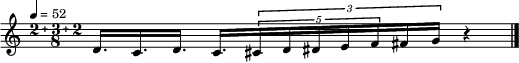

In [18]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    
    makeNote(61, F(2, 3)*F(1, 5)),
    makeNote(62, F(2, 3)*F(1, 5)),
    makeNote(63, F(2, 3)*F(1, 5)),
    makeNote(64, F(2, 3)*F(1, 5)),
    makeNote(65, F(2, 3)*F(1, 5)),
    makeNote(66, F(2, 3)*F(1, 4)),
    makeNote(67, F(2, 3)*F(1, 4)), 
    
]

struct = ScoreStruct(timesig='7/8', quarterTempo=52)
struct.getMeasureDef(0).subdivisionStructure = (2, 3, 2)

part = scoring.Part(notes)
quantprofile = scoring.quant.makeQuantizationProfile('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')